In [216]:
from pycaret.datasets import get_data
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

<p>In our dataset, we have data about diamond information, such as colors, clarity, cut etc, and with that we will try to use the regression to make a <b>prediction</b> of its price. We mainly have categorical attributes, with the carat weight of float.</p>

* price price in US dollars ($326--$18,823);
* carat weight of the diamond (0.2--5.01);
* cut quality of the cut (Fair, Good, Very Good, Premium, Ideal);
* color diamond colour, from J (worst) to D (best);
* clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best));
* Symmetry degrees of symmetry;
* Report types of measurement reporting.

# Info Data

In [237]:
df = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB


<p> We can see that the Carat Weight variable presents an apparently linear distribution, compared to the price, which will make our lives easier for our regression. </p>

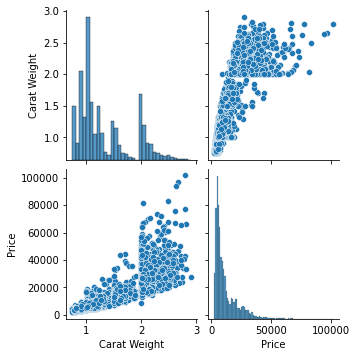

In [239]:
sns.pairplot(df)

<p> We will carry out our resource engineering, to transform our data, with hot encoding and label encoding. </p>

In [240]:
df = pd.get_dummies(df,columns=['Cut','Clarity','Polish','Symmetry','Color'])
df['Report'] = df.Report.replace({'GIA':0,'AGSL':1})

<p>Organizing the data for our validation.</p>

In [241]:
X = df.drop('Price',axis=1)
Y = df.Price

In [242]:
x_train,x_test,y_train,y_test = train_test_split(X,Y)

In [243]:
# Create poly features
x_train_poly = PolynomialFeatures().fit_transform(x_train)
x_test_poly = PolynomialFeatures().fit_transform(x_test)

In [245]:
# Create Models
LR = LinearRegression()
Ls = Lasso()
Rg = Ridge()
models = [LR,Ls,Rg]

<p>Testing our linear, lasso and ridge models, with poly features and without poly features. We can see that the Lasso model stands out with 96.8% of accurate prediction, after the polynomial scale, and that before it reached only 85.5% of prediction.</p>

In [247]:
for i in models:
    i.fit(x_train,y_train)
    print(i,'standard',r2_score(i.predict(x_test),y_test))
    i.fit(x_train_poly,y_train)
    print(i,'poly',r2_score(i.predict(x_test_poly),y_test))

LinearRegression() standard 0.8553778328245636
LinearRegression() poly -0.0006671114030458725
Lasso() standard 0.8553349445585403
Lasso() poly 0.9682522043955439
Ridge() standard 0.8553375894830743
Ridge() poly 0.9678699077459006


C:\Users\felip\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 554478381.5070915, tolerance: 48830656.76741565
  model = cd_fast.enet_coordinate_descent(
